# Neural Network

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data_tst=pd.read_csv('/Users/DEEPAK/downloads/Datasets/mnist_test.csv')
data_tain=pd.read_csv('/Users/DEEPAK/downloads/mnist_train_small.csv')

In [3]:
data_tain.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shuffling the dataset before splitting in training sets

In [10]:
data_tain=np.array(data_tain)
m, n = data_tst.shape
#np.random.shuffle(data_tain) # shuffle before splitting into dev and training sets
data_tst=np.array(data_tst)
data_test = data_tst[0:m].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.
p,q=data_tain.shape
data_train = data_tain[0:p].T
Y_train = data_train[0]
X_train = data_train[1:q]
X_train = X_train / 255.
_,m_train = X_train.shape

In [11]:
Y_train

array([5, 7, 9, ..., 2, 9, 5], dtype=int64)

In [12]:
def init_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def Max_v(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = Max_v(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def max_v_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * max_v_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 4 9 ... 2 3 3] [5 7 9 ... 2 9 5]
0.12905645282264114
Iteration:  10
[0 0 9 ... 3 9 7] [5 7 9 ... 2 9 5]
0.2504125206260313
Iteration:  20
[0 0 9 ... 0 9 1] [5 7 9 ... 2 9 5]
0.41637081854092706
Iteration:  30
[0 0 9 ... 2 9 1] [5 7 9 ... 2 9 5]
0.5750787539376969
Iteration:  40
[0 0 9 ... 2 9 4] [5 7 9 ... 2 9 5]
0.6502825141257063
Iteration:  50
[5 0 9 ... 2 9 5] [5 7 9 ... 2 9 5]
0.688184409220461
Iteration:  60
[5 0 9 ... 2 9 5] [5 7 9 ... 2 9 5]
0.7140857042852142
Iteration:  70
[5 0 9 ... 2 9 5] [5 7 9 ... 2 9 5]
0.7344367218360918
Iteration:  80
[5 0 9 ... 2 9 5] [5 7 9 ... 2 9 5]
0.7488374418720936
Iteration:  90
[5 0 9 ... 2 9 5] [5 7 9 ... 2 9 5]
0.7605880294014701
Iteration:  100
[5 0 9 ... 2 9 5] [5 7 9 ... 2 9 5]
0.7721386069303465
Iteration:  110
[5 0 9 ... 2 9 5] [5 7 9 ... 2 9 5]
0.7817390869543477
Iteration:  120
[5 0 9 ... 2 9 5] [5 7 9 ... 2 9 5]
0.7895394769738487
Iteration:  130
[5 0 9 ... 2 9 5] [5 7 9 ... 2 9 5]
0.7970898544927246
Iteration:  140


In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


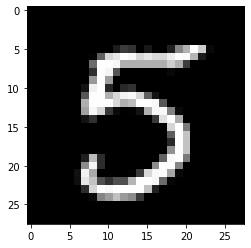

Prediction:  [0]
Label:  7


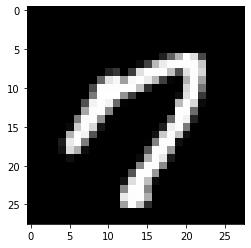

Prediction:  [2]
Label:  2


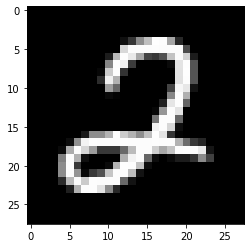

Prediction:  [5]
Label:  5


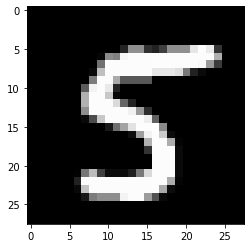

In [15]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)

In [16]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[2 1 0 ... 4 5 6] [2 1 0 ... 4 5 6]


0.8788878887888789